# Tutorial
* http://scikit-learn.org/stable/auto_examples/classification/plot_classification_probability.html
* https://machine-learning-python.kspax.io/Classification/ex3_Plot_classification_probability.html

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
X = iris.data[:, 0:2]  # 僅使用前兩個特徵，方便視覺化呈現
y = iris.target

n_features = X.shape[1]

In [6]:
for key,value in iris.items() :
    try:
        print (key,value.shape)
    except:
        print (key)

('target_names', (3,))
('data', (150, 4))
('target', (150,))
DESCR
feature_names


In [7]:
C = 1.0

# Create different classifiers. The logistic regression cannot do
# multiclass out of the box.
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
               'L2 logistic (OvR)': LogisticRegression(C=C, penalty='l2'),
               'Linear SVC': SVC(kernel='linear', C=C, probability=True,
                                 random_state=0),
               'L2 logistic (Multinomial)': LogisticRegression(
                C=C, solver='lbfgs', multi_class='multinomial'
                )}

n_classifiers = len(classifiers)

In [8]:
xx, yy = np.meshgrid(np.linspace(1,3,3), np.linspace(4,6,3).T)
Xfull = np.c_[xx.ravel(), yy.ravel()]
print('xx= \n%s\n' % xx)
print('yy= \n%s\n' % yy)
print('xx.ravel()= %s\n' % xx.ravel())
print('Xfull= \n%s' % Xfull)

xx= 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

yy= 
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

xx.ravel()= [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]

Xfull= 
[[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]


In [9]:
plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

classif_rate for L2 logistic (OvR) : 76.666667 
classif_rate for L1 logistic : 79.333333 
classif_rate for Linear SVC : 82.000000 
classif_rate for L2 logistic (Multinomial) : 82.000000 


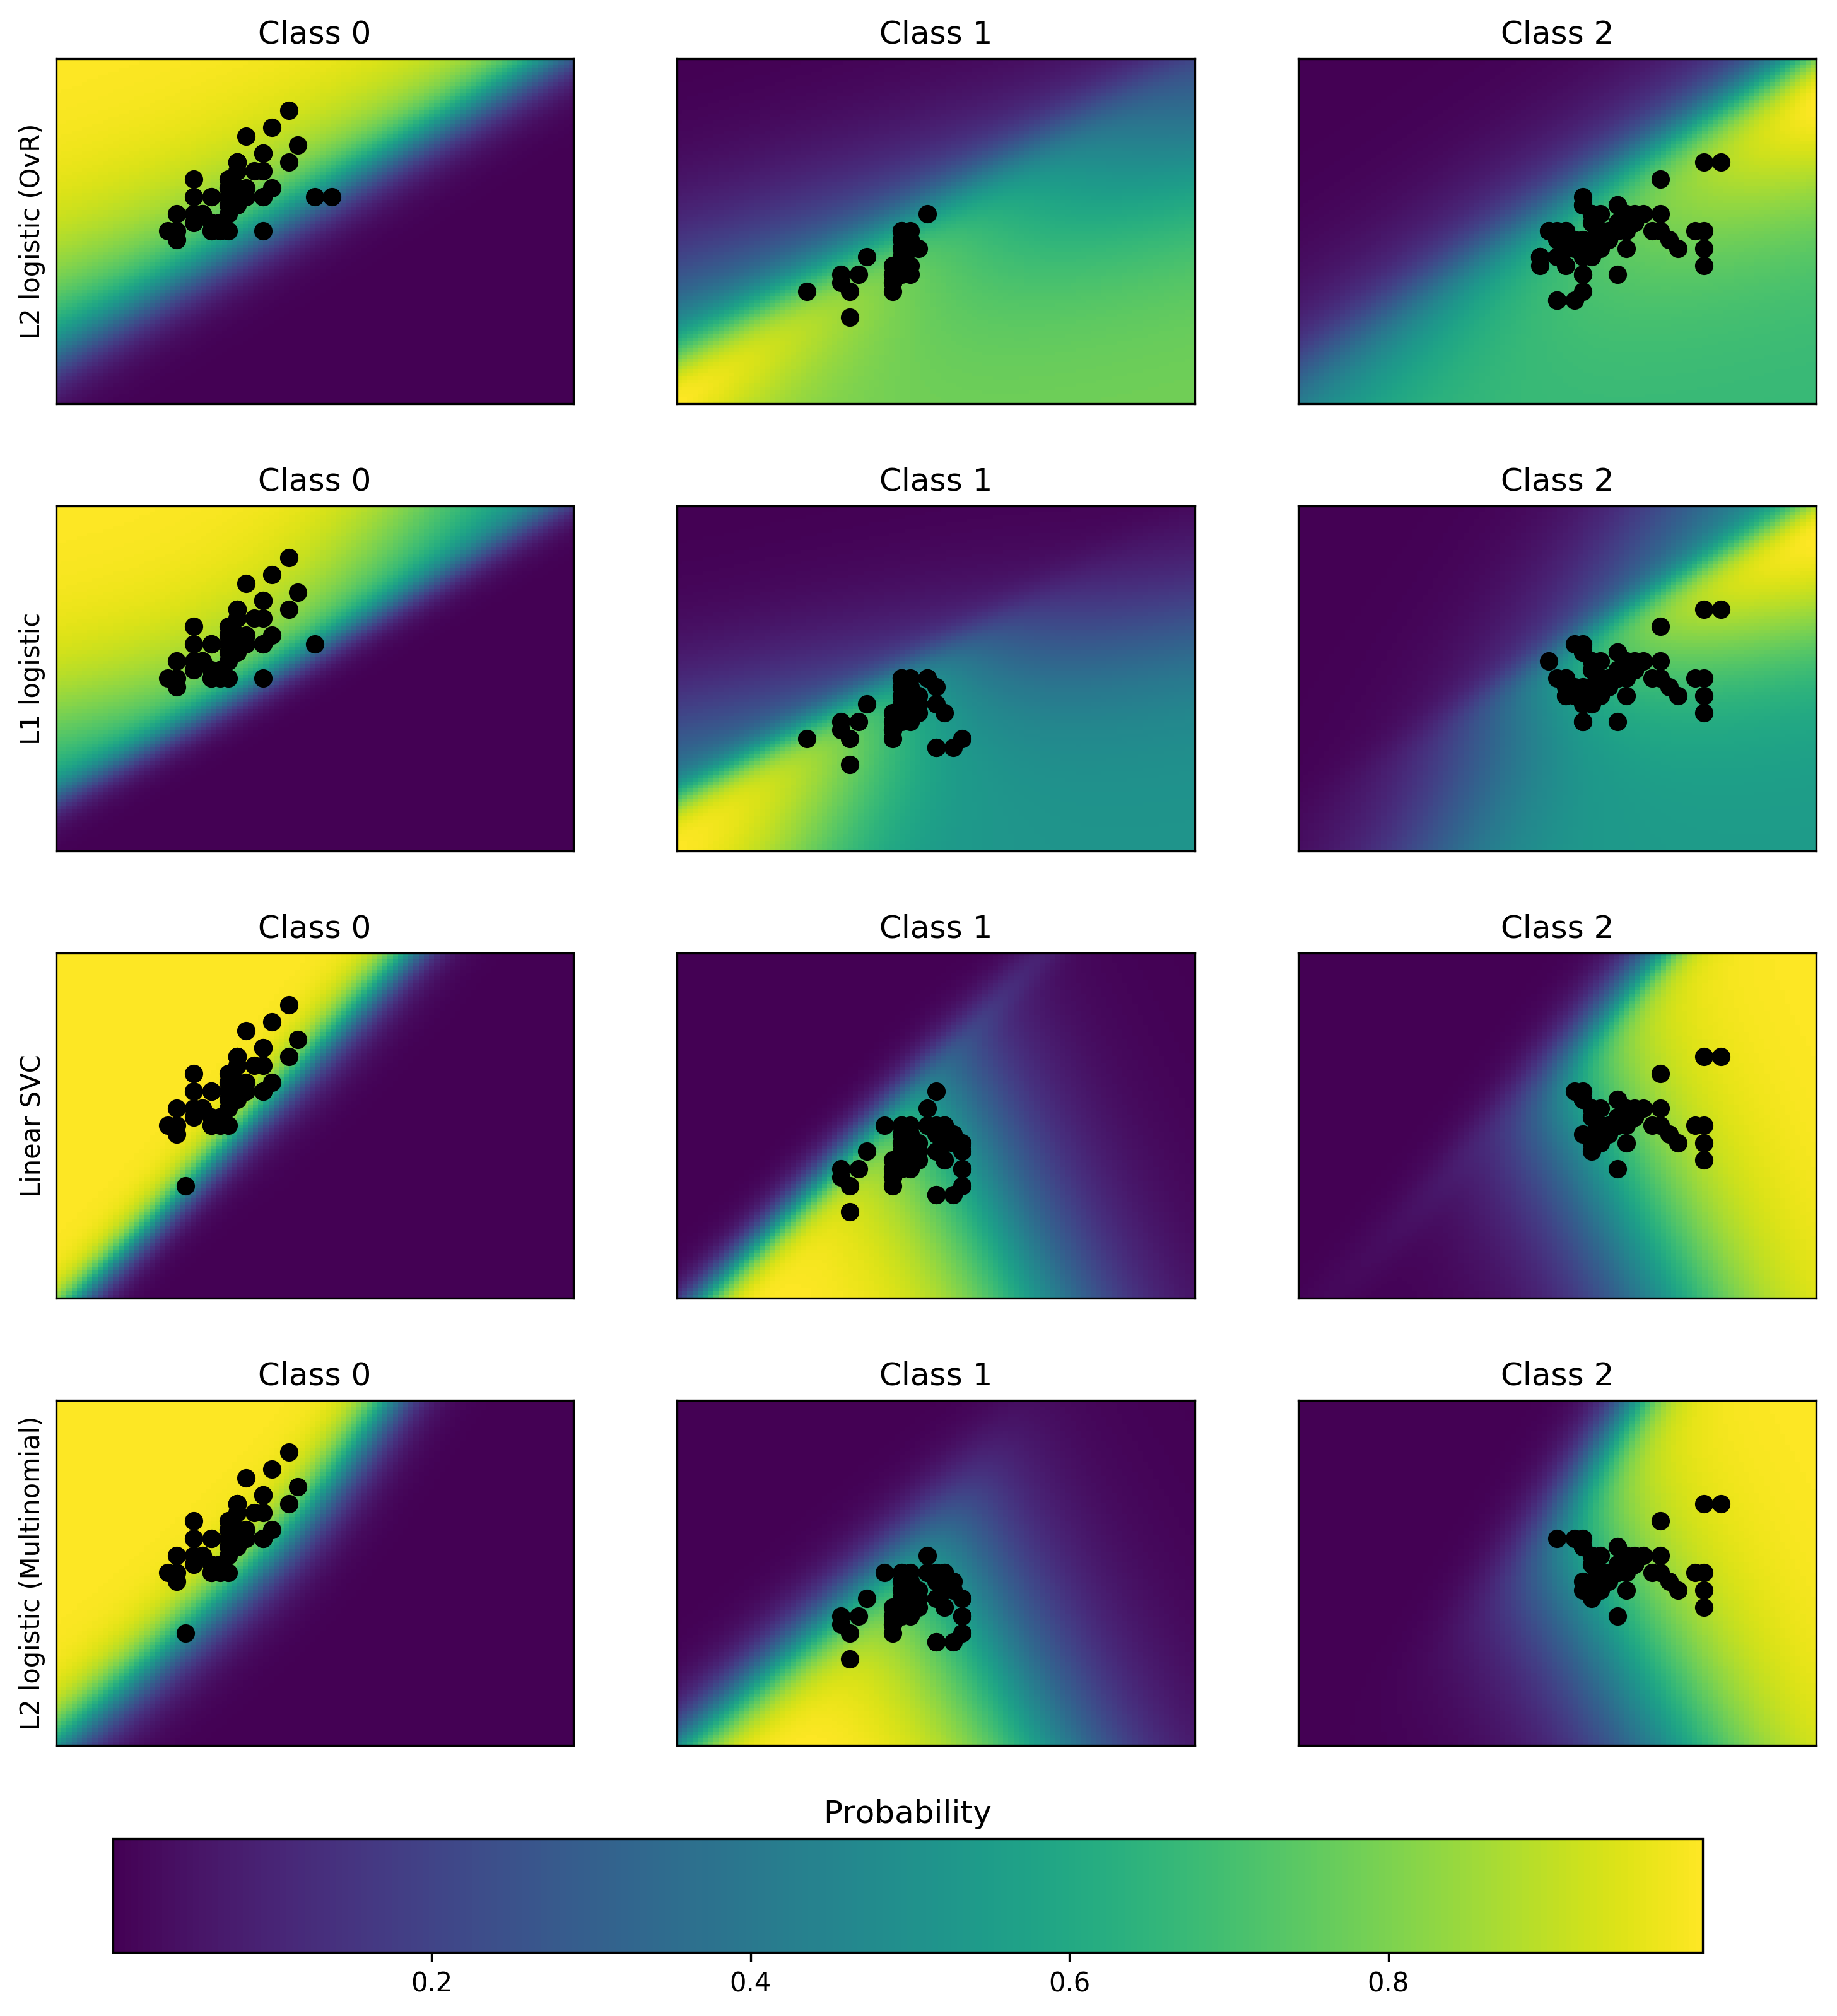

In [11]:
%matplotlib inline
fig = plt.figure(figsize=(12,12), dpi=300)

for index, (name, classifier) in enumerate(classifiers.items()):
    #訓練並計算分類成功率
    #然而此範例訓練跟測試用相同資料集，並不符合實際狀況。
    #建議採用cross_validation的方式才能較正確評估
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel()) * 100
    print("classif_rate for %s : %f " % (name, classif_rate))

    # View probabilities=
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index * n_classes + k + 1)
        plt.title("Class %d" % k)
        if k == 0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                   extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')

ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title("Probability")
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()

延伸問題：
1. Logistic Regression不能做multiclass的分類?